In [1]:
import os
import sys
from nrel_uitls import CLIMATEZONES, RESTYPES
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
# import h5py
# from storage import upload_to_bucket

from schema import Schema, TimeSeriesOutput,  WhiteboxSimulation, SchedulesParameters


In [2]:
with open("./data/city_map.json","r") as f:
	city_map = json.load(f)

In [3]:
timeseries = [
    TimeSeriesOutput(
        name="DistrictCooling",
        # var_name="Cooling:DistrictCooling",
        key_name="Cooling:DistrictCooling",
        key="OUTPUT:METER",
        freq="Monthly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="DistrictHeating",
        key_name="Heating:DistrictHeating",
        key="OUTPUT:METER",
        freq="Monthly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="Supply Air Heating",
        var_name="Zone Ideal Loads Supply Air Total Heating Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="Supply Air Cooling",
        var_name="Zone Ideal Loads Supply Air Total Cooling Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="OA Heating",
        var_name="Zone Ideal Loads Outdoor Air Total Heating Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="OA Cooling",
        var_name="Zone Ideal Loads Outdoor Air Total Cooling Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    #Zone Ideal Loads Supply Air Total Heating Energy 
    #Zone Ideal Loads Zone Total Heating Energy
]
schema = Schema(timeseries_outputs=timeseries)
# schema = Schema()

## Compare UMI shoebox to whitebox

Load a few random umi shoeboxes

In [4]:
from umi_surrogate import UmiSurrogate
umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings.umi"
energy_results_path = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus"
umi = UmiSurrogate.open(
    umi_path=umi_path, 
    schema=schema,
    compute_loss=True,
    energy_results_path=energy_results_path,
    checkpoint="deeper_output_net_with_leaky_relus_resumed/deeper_output_net_with_leaky_relus_resumed_202307232139_000_350000.pt")
# Load energy results
new_p = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings/eplus"
# new_p = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus"
umi.set_energy_path(new_p)
umi.fetch_raw_shoebox_results(override=False)
print(umi.shoeboxdf.shape)
umi.shoeboxdf.head()

INFO:Storage:Successfully fetched bucket location
INFO:UmiSurrogate:Umi shoebox hourly energy will be saved in d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\umi\energy
INFO:UmiSurrogate:Opening umi project. This may take a few moments...
INFO:UmiSurrogate:Project name: SampleBuildings
INFO:UmiSurrogate:Setting up umi surrogate...
INFO:UmiSurrogate:Extracting climate data from umi project.
INFO:UmiSurrogate:Successfully loaded EPW file Data for [Boston Logan IntL Arpt]
INFO:UmiSurrogate:Climate vector loaded with shape (7, 8760)
INFO:UmiSurrogate:Collecting data from building templates...
INFO:Surrogate:Using cuda for surrogate model.
INFO:Surrogate:28 building parameters per input vector
INFO:Surrogate:11 timeseries per input vector
INFO:Surrogate:4 timeseries per output vector
INFO:Surrogate:12 timesteps in output.
INFO:Surrogate:Initializing machine learning objects...
INFO:Surrogate:ML objects initialized.
INFO:UmiSurrogate:Hourly output already calculated and s

(364, 25)


,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
0,45528662-89aa-7b48-8da3-1153c0ecbd22,258.010417,344.437341,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
1,45528662-89aa-7b48-8da3-1153c0ecbd22,23.925238,31.939584,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
2,45528662-89aa-7b48-8da3-1153c0ecbd22,319.021121,425.885078,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
3,45528662-89aa-7b48-8da3-1153c0ecbd22,27.396955,36.574237,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
4,45528662-89aa-7b48-8da3-1153c0ecbd22,344.588024,460.016242,1255.630962,1676.23538,South,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."


In [5]:
shoeboxes = umi._fetch_shoeboxcollection()

INFO:UmiSurrogate:Fetching shoebox IDFs.
INFO:UmiSurrogate:Completed fetching shoebox IDFs in 24 seconds.


In [6]:
# randomly select n samples
n = 2
indices = np.random.randint(0, high=umi.shoeboxdf.shape[0], size=[2])
test_sbs = umi.shoeboxdf.iloc[indices]
test_sbs

,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
275,f861f480-e8eb-9741-b2cc-e1d81ab0b6e6,7.566950,21.649585,6235.340620,17839.755705,South,Group6,0.166667,0.166667,0.902471,...,19.276318,5541.0,4815,PROG_02_VINTAGE_02_MASS_1,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3221.08314 1008.75508, 3237.49..."
297,40c15cd0-0276-7b46-85cc-6434d4cb8410,345.434946,860.451010,4579.037017,11406.017453,East,Group7,0.111111,0.111111,0.928760,...,27.146484,2256.0,3197,PROG_00_VINTAGE_02_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((2771.62316 1873.53018, 2776.81..."


In [7]:
from archetypal.template.constructions.opaque_construction import OpaqueConstruction
from archetypal.template.constructions.window_construction import WindowConstruction
from archetypal.schedule import Schedule
from schedules import update_schedule_objects, schedule_paths

def sb_height(sb):
    for s in sb.getsurfaces():
        if s.Surface_Type == "Wall":
            vertices_idx = [i for i, x in enumerate(vars(s)['objls']) if "Zcoordinate" in x]
            z_idxs = []
            try:
                for i in vertices_idx:
                    z_idxs.append(vars(s)["obj"][i])
            except:
                h = max(z_idxs) - min(z_idxs)
                break
    return h
    

def build_whitebox_from_umi(
        shoebox,
        floor_2_facade, 
        core_2_perim, 
        roof_2_footprint, 
        ground_2_footprint,
        cz=CLIMATEZONES["2A"], 
        vintage=1920, 
        program=RESTYPES["Multi-Family with 5+ Units"], 
        base_epw=city_map["CA, Los Angeles"]["idx"]
        ):

    # Reposition shoebox at origin
    sb = shoebox
    sb.translate_to_origin()

    storage_vector = schema.generate_empty_storage_vector()

    schema.update_storage_vector(storage_vector, parameter="climate_zone", value=cz)
    schema.update_storage_vector(storage_vector, parameter="vintage", value=vintage)
    schema.update_storage_vector(storage_vector, parameter="program_type", value=program)
    schema.update_storage_vector(storage_vector, parameter="base_epw", value=base_epw)
    schema.update_storage_vector(storage_vector, "height", sb_height(sb))
    schema.update_storage_vector(storage_vector, "width", sb.width)
    schema.update_storage_vector(storage_vector, "floor_2_facade", floor_2_facade)
    schema.update_storage_vector(storage_vector, "core_2_perim", core_2_perim)
    schema.update_storage_vector(storage_vector, "roof_2_footprint", roof_2_footprint)
    schema.update_storage_vector(storage_vector, "ground_2_footprint", ground_2_footprint)
    schema.update_storage_vector(storage_vector, "wwr", sb.wwr().iloc[0]["wwr_rounded_%"]/100)
    # NOTE AZIMUTH IS ROUNDED
    windows = sb.getsubsurfaces()
    orientation = (180 - round(windows[0].azimuth))/90 # TODO check what south means??
    schema.update_storage_vector(storage_vector, "orientation", orientation)
    schema.update_storage_vector(storage_vector, "Infiltration", sb.idfobjects['ZONEINFILTRATION:DESIGNFLOWRATE'][0].Air_Changes_per_Hour)
    schema.update_storage_vector(storage_vector, "HeatingSetpoint", [x for x in sb.idfobjects['SCHEDULE:CONSTANT'] if x.Name == "PerimHeating_SP_Sch"][0].Hourly_Value)
    schema.update_storage_vector(storage_vector, "CoolingSetpoint", [x for x in sb.idfobjects['SCHEDULE:CONSTANT'] if x.Name == "PerimCooling_SP_Sch"][0].Hourly_Value)
    schema.update_storage_vector(storage_vector, "PeopleDensity", sb.idfobjects['PEOPLE'][0].People_per_Zone_Floor_Area)
    schema.update_storage_vector(storage_vector, "LightingPowerDensity", sb.idfobjects['LIGHTS'][0].Watts_per_Zone_Floor_Area)
    schema.update_storage_vector(storage_vector, "EquipmentPowerDensity", sb.idfobjects['ELECTRICEQUIPMENT'][0].Watts_per_Zone_Floor_Area)
    
    roof_r = None
    wall_r = None
    slab_r = None
    roof_m = None
    wall_m = None
    slab_m = None
    for s in sb.getsurfaces():
        if s.Surface_Type.lower() == "roof" and roof_r is None:
            c = s.get_referenced_object("Construction_Name")
            oc = OpaqueConstruction.from_epbunch(c)
            roof_r = oc.u_factor
            roof_m = oc.heat_capacity_per_unit_wall_area
        if s.Surface_Type.lower() == "wall" and wall_r is None:
            c = s.get_referenced_object("Construction_Name")
            oc = OpaqueConstruction.from_epbunch(c)
            wall_r = oc.u_factor
            wall_m = oc.heat_capacity_per_unit_wall_area
        if s.Surface_Type.lower() == "floor" and slab_r is None:
            c = s.get_referenced_object("Construction_Name")
            oc = OpaqueConstruction.from_epbunch(c)
            slab_r = oc.u_factor
    
    schema.update_storage_vector(storage_vector, "RoofRValue", roof_r)
    schema.update_storage_vector(storage_vector, "SlabRValue", slab_r)
    schema.update_storage_vector(storage_vector, "FacadeRValue", wall_r)
    schema.update_storage_vector(storage_vector, "FacadeMass", wall_m) 
    schema.update_storage_vector(storage_vector, "RoofMass", roof_m)

    w = sb.idfobjects['FENESTRATIONSURFACE:DETAILED'][0].get_referenced_object("Construction_Name")
    window = WindowConstruction.from_epbunch(w)
    uval = window.u_factor
    try:
        shgc = window.shgc()
    except:
        tsol = window.Layers[0].Material.SolarTransmittance
        shgc = WindowParameter.single_pane_shgc_estimation(tsol=tsol, uval=uval)

    schema.update_storage_vector(storage_vector, "WindowSettings", np.array([uval,shgc])) 

    # schema.update_storage_vector(storage_vector, "shading_seed", 2) TODO
    schema.update_storage_vector(storage_vector, "EconomizerSettings", 1)
    schema.update_storage_vector(storage_vector, "RecoverySettings", 2)

    whitebox_sim = WhiteboxSimulation(schema, storage_vector)

    # Extract schedules vectors - ORDER MATTERS
    eqip_sched = Schedule.from_epbunch(sb.idfobjects['ELECTRICEQUIPMENT'][0].get_referenced_object("Schedule_Name")).series.to_numpy()
    lght_sched = Schedule.from_epbunch(sb.idfobjects['LIGHTS'][0].get_referenced_object("Schedule_Name")).series.to_numpy()
    occ_sched = Schedule.from_epbunch(sb.idfobjects['PEOPLE'][0].get_referenced_object("Number_of_People_Schedule_Name")).series.to_numpy()

    update_schedule_objects(
        whitebox_sim.template,
        timeseries=np.stack((eqip_sched, lght_sched, occ_sched)),
        zones=["Perimeter"],
        paths=schedule_paths,
        id=0,
    )
    update_schedule_objects(
        whitebox_sim.template,
        timeseries=np.stack((eqip_sched, lght_sched, occ_sched)),
        zones=["Core"],
        paths=schedule_paths,
        id=0,
    )

    whitebox_sim.template.Perimeter.Conditioning.MechVentSchedule = (
        whitebox_sim.template.Perimeter.Loads.OccupancySchedule
    )
    whitebox_sim.template.Perimeter.DomesticHotWater.WaterSchedule = (
        whitebox_sim.template.Perimeter.Loads.OccupancySchedule
    )

    whitebox_sim.shoebox.idfobjects['SHADING:BUILDING:DETAILED'] = sb.idfobjects['SHADING:BUILDING:DETAILED']
    
    return whitebox_sim

c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\io\formats\printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a mu

ParentBuildingId                    f861f480-e8eb-9741-b2cc-e1d81ab0b6e6
PerimeterAreaWeight                                              7.56695
CoreAreaWeight                                                 21.649585
PerimeterArea                                                 6235.34062
CoreArea                                                    17839.755705
Orientation                                                        South
ClusterId                                                         Group6
Roof2FloorRatio                                                 0.166667
Ground2FloorRatio                                               0.166667
Floor2Fac                                                       0.902471
Core2Perimeter                                                  2.861072
ShoeboxPath            D:\Users\zoelh\GitRepos\ml-for-building-energy...
id                                  f861f480-e8eb-9741-b2cc-e1d81ab0b6e6
FloorCount                                         

INFO:Schema:Skipping update of window parameters - will build simple window in build_shoebox
INFO:Schema:height = 3.0920000000000023, width = 6.2215000000001055, perim_depth = 2.790439929009152, core_depth = 2.650917932558694
C:\EnergyPlusV9-2-0\ExpandObjects.EXE #0-5bdd5c3a-5c9b-11ee-bfc6-004e01c02093.idf: 4.00it [00:00, 19.0it/s]
C:\EnergyPlusV9-2-0\energyplus.exe 5bdd5c3a-5c9b-11ee-bfc6-004e01c02093.idf: 55it [00:02, 21.81it/s]




------------------------------
EPW: d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\data\epws\city_epws_indexed\cityidx_0000_USA_CA-Climate Zone 9.722880_CTZRV2.epw
Selected Template: PROG_03_VINTAGE_00_MASS_1
---ShoeboxConfig---
Height 3.0920000000000023
Width 6.2215000000001055
WWR 0.4
Floor2Facade 0.9024708696666074
Core2Perim 0.95
Foot2Gnd [adia %] 0.16666666666666535
Roof2Gnd [adia %] 0.16666666666666535
Orientation -0.2
---PERIM/CORE Values---
Heating Setpoint: 20.0 20.0
Cooling Setpoint: 26.0 26.0
Equipment Power Density: 4.41 4.41
Lighting Power Density: 3.43 3.43
People Density: 0.2 0.2
Infiltration: 0.872 0.872
Roof HeatCap: 230221.09285714285 230221.09285714285
Facade HeatCap: 229496.78921080232 229496.78921080232
U Window: 300.0
Roof RSI: 0.3
Facade RSI: 0.4810197668599562
Slab RSI: 0.29999999999999993
Partition RSI: 0.6526162790697675
Ground RSI: 0.29999999999999993
Roof Assembly: [12:Concrete_Dense_1 with thickness of 0.100 m, 19:Plywood_Board with th

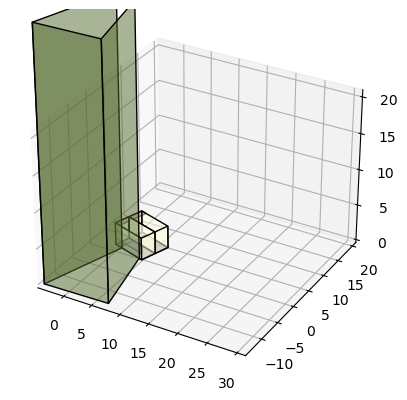

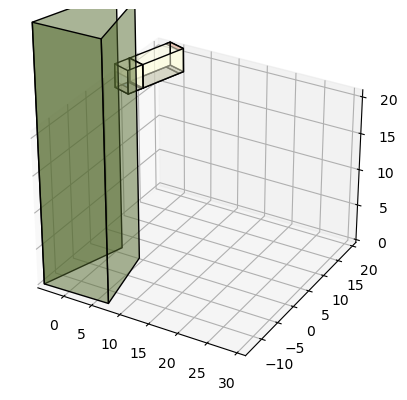

c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\zoelh\AppData\Local\anaconda3\envs\ml-for-bem\lib\site-packages\pandas\io\formats\printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a mu

ParentBuildingId                    40c15cd0-0276-7b46-85cc-6434d4cb8410
PerimeterAreaWeight                                           345.434946
CoreAreaWeight                                                 860.45101
PerimeterArea                                                4579.037017
CoreArea                                                    11406.017453
Orientation                                                         East
ClusterId                                                         Group7
Roof2FloorRatio                                                 0.111111
Ground2FloorRatio                                               0.111111
Floor2Fac                                                        0.92876
Core2Perimeter                                                  2.490921
ShoeboxPath            D:\Users\zoelh\GitRepos\ml-for-building-energy...
id                                  40c15cd0-0276-7b46-85cc-6434d4cb8410
FloorCount                                         

INFO:Schema:Skipping update of window parameters - will build simple window in build_shoebox
INFO:Schema:height = 3.0805, width = 10.140300000000025, perim_depth = 2.861045970734661, core_depth = 2.717993672197928
C:\EnergyPlusV9-2-0\ExpandObjects.EXE #0-60f5e25b-5c9b-11ee-a870-004e01c02093.idf: 4.00it [00:00, 19.9it/s]
C:\EnergyPlusV9-2-0\energyplus.exe 60f5e25b-5c9b-11ee-a870-004e01c02093.idf: 55it [00:02, 20.37it/s]




------------------------------
EPW: d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\data\epws\city_epws_indexed\cityidx_0000_USA_CA-Climate Zone 9.722880_CTZRV2.epw
Selected Template: PROG_03_VINTAGE_00_MASS_1
---ShoeboxConfig---
Height 3.0805
Width 10.140300000000025
WWR 0.4
Floor2Facade 0.9287602566903623
Core2Perim 0.95
Foot2Gnd [adia %] 0.11111111111111209
Roof2Gnd [adia %] 0.11111111111111209
Orientation 0.9333333333333333
---PERIM/CORE Values---
Heating Setpoint: 20.0 20.0
Cooling Setpoint: 26.0 26.0
Equipment Power Density: 5.7 5.7
Lighting Power Density: 3.31 3.31
People Density: 0.2 0.2
Infiltration: 0.872 0.872
Roof HeatCap: 229625.67569142857 229625.67569142857
Facade HeatCap: 32047.100160332462 32047.100160332462
U Window: 300.0
Roof RSI: 0.3
Facade RSI: 0.4900702485548751
Slab RSI: 0.29999999999999993
Partition RSI: 0.6526162790697675
Ground RSI: 0.29999999999999993
Roof Assembly: [12:Concrete_Dense_1 with thickness of 0.100 m, 19:Plywood_Board with th

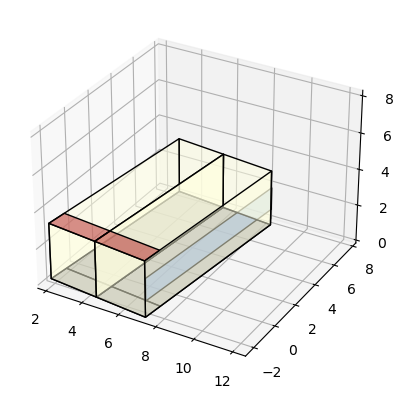

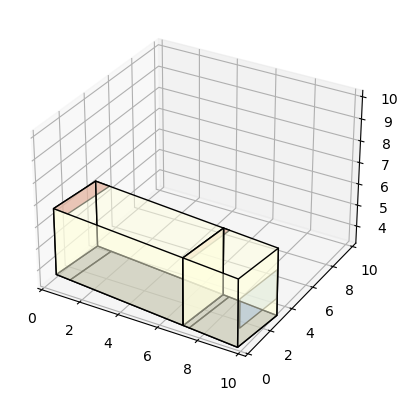

In [8]:
epw = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/ml-for-bem/data/epws/city_epws_indexed/cityidx_0000_USA_CA-Climate Zone 9.722880_CTZRV2.epw"
for i in indices:
    sb_info = umi.shoeboxdf.iloc[i]
    print(sb_info)
    sb = shoeboxes[sb_info['ShoeboxPath']]

    whitebox_sim = build_whitebox_from_umi(
        shoebox = sb,
        floor_2_facade = sb_info["Floor2Fac"],
        core_2_perim = sb_info["Core2Perimeter"],
        roof_2_footprint = sb_info["Roof2FloorRatio"],
        ground_2_footprint = sb_info["Ground2FloorRatio"],
        )
    # print(whitebox_sim.summarize())
    wb_hourly, wb_monthly = whitebox_sim.simulate()
    print(whitebox_sim.summarize())
    whitebox_sim.shoebox.view_model()
    sb.view_model()

In [10]:
sb.width

10.140300000000025

## Check whitebox output edits

In [4]:
storage_vector = schema.generate_empty_storage_vector()
# just using 
# TODO: orientation
# TODO: setpoint value overlaps
# TODO: Fix template Selector
# TODO: window u value coming out different
schema.update_storage_vector(storage_vector, parameter="climate_zone", value=CLIMATEZONES["2A"])
schema.update_storage_vector(storage_vector, parameter="vintage", value=1920)
schema.update_storage_vector(storage_vector, parameter="program_type", value=RESTYPES["Multi-Family with 5+ Units"])
schema.update_storage_vector(storage_vector, parameter="base_epw", value=city_map["CA, Los Angeles"]["idx"])
schema.update_storage_vector(storage_vector, "height", 3)
schema.update_storage_vector(storage_vector, "width", 3)
schema.update_storage_vector(storage_vector, "floor_2_facade", 0.3)
schema.update_storage_vector(storage_vector, "floor_2_facade", 0.5)
schema.update_storage_vector(storage_vector, "roof_2_footprint", 0.05)
schema.update_storage_vector(storage_vector, "ground_2_footprint", 0.5)
schema.update_storage_vector(storage_vector, "wwr", 0.3)
schema.update_storage_vector(storage_vector, "orientation", 0)
schema.update_storage_vector(storage_vector, "Infiltration", 1.0)
schema.update_storage_vector(storage_vector, "HeatingSetpoint", 18)
schema.update_storage_vector(storage_vector, "CoolingSetpoint", 24)
schema.update_storage_vector(storage_vector, "PeopleDensity", 0.05)
schema.update_storage_vector(storage_vector, "LightingPowerDensity", 3)
schema.update_storage_vector(storage_vector, "EquipmentPowerDensity", 7)
schema.update_storage_vector(storage_vector, "RoofRValue", 2)
schema.update_storage_vector(storage_vector, "SlabRValue", 2)
schema.update_storage_vector(storage_vector, "FacadeRValue", 2)
schema.update_storage_vector(storage_vector, "FacadeMass", 10000) 
schema.update_storage_vector(storage_vector, "RoofMass", 10000)
schema.update_storage_vector(storage_vector, "WindowSettings", np.array([1.0,0.5])) 

#NEW VALUES
# schema.update_storage_vector(storage_vector, "WindowSettings", 2)
schema.update_storage_vector(storage_vector, "shading_seed", 2)
schema.update_storage_vector(storage_vector, "EconomizerSettings", 1)
schema.update_storage_vector(storage_vector, "RecoverySettings", 2)

schedules = schema["schedules"].extract_storage_values(storage_vector)
sched_demo = "NONE"
if sched_demo == "BASELINE":
    # Equipment
    # pass
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["noise"]] = 0.2
    # Lights
    schedules[2, SchedulesParameters.op_indices["invert"]] = 1
elif sched_demo == "SINE":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[0, SchedulesParameters.op_indices["sin_0_amp"]] = 0.5
    schedules[0, SchedulesParameters.op_indices["sin_0_freq"]] = 365
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[1, SchedulesParameters.op_indices["sin_0_amp"]] = 0.5
    schedules[1, SchedulesParameters.op_indices["sin_0_freq"]] = 365
    schedules[1, SchedulesParameters.op_indices["sin_1_amp"]] = 0.5
    schedules[1, SchedulesParameters.op_indices["sin_1_freq"]] = 4
    # Lights
    schedules[2, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[2, SchedulesParameters.op_indices["sin_0_amp"]] = 1.0
    schedules[2, SchedulesParameters.op_indices["sin_0_freq"]] = 24 # 2 per mo
elif sched_demo == "BERNOULLI":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[0, SchedulesParameters.op_indices["uniform_random_samples"]] = 10 # samples per pattern
    schedules[0, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[1, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[1, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
    # Lights
    schedules[2, SchedulesParameters.op_indices["uniform_random_dilation"]] = 24 # hours per sample
    schedules[2, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[2, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
elif sched_demo == "UNI_RAND":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[0, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[0, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous

    # Occupancy
    schedules[1, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[1, SchedulesParameters.op_indices["uniform_random_samples"]] = 24 # samples per pattern
    schedules[1, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous

    # Lights
    schedules[2, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[2, SchedulesParameters.op_indices["uniform_random_samples"]] = 22 # samples per pattern
    schedules[2, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous
elif sched_demo == "PULSE":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["pulse_period"]] = 24*7 # 7 day cycle
    schedules[0, SchedulesParameters.op_indices["pulse_width"]] = 24*5 # on for 5 days

    # Occupancy
    schedules[1, SchedulesParameters.op_indices["pulse_period"]] = 24 # 1 day cycle
    schedules[1, SchedulesParameters.op_indices["pulse_width"]] = 15 # on for 5 days

    # Lights
    schedules[2, SchedulesParameters.op_indices["pulse_period"]] = 23 # 23 hr cycle
    schedules[2, SchedulesParameters.op_indices["pulse_width"]] = 18 # on for 11 hrs

# schedules[2, SchedulesParameters.op_indices["noise"]] = 0.5 # Occupancy
schedules[1, SchedulesParameters.op_indices["noise"]] = 0.3 # Lights
# schedules[0, SchedulesParameters.op_indices["noise"]] = 0.5 # equip

In [5]:
whitebox_sim = WhiteboxSimulation(schema, storage_vector)
whitebox_sim.summarize()

INFO:Schema:Skipping update of window parameters - will build simple window in build_shoebox




------------------------------
EPW: d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\data\epws\city_epws_indexed\cityidx_0000_USA_CA-Climate Zone 9.722880_CTZRV2.epw
Selected Template: PROG_03_VINTAGE_00_MASS_1
---ShoeboxConfig---
Height 3.0
Width 3.0
WWR 0.3
Facade2Foot 0.3
Perim2Foot 0.5
Foot2Gnd [adia %] 0.5
Roof2Gnd [adia %] 0.05
Orientation 0.0
---PERIM/CORE Values---
Heating Setpoint: 18.0 18.0
Cooling Setpoint: 24.0 24.0
Equipment Power Density: 7.0 7.0
Lighting Power Density: 3.0 3.0
People Density: 0.05 0.05
Infiltration: 1.0 1.0
Roof HeatCap: 12796.244999999999 12796.244999999999
Facade HeatCap: 12796.245 12796.245
U Window: 300.0
Roof RSI: 2.0
Facade RSI: 2.0
Slab RSI: 2.0
Partition RSI: 0.6526162790697675
Ground RSI: 2.0
Roof Assembly: [20:Fiberglass_Batts with thickness of 0.082 m, 14:Gypsum_Board with thickness of 0.015 m]
Facade Assembly: [20:Fiberglass_Batts with thickness of 0.082 m, 14:Gypsum_Board with thickness of 0.015 m]
Partition Assembly: [14

In [10]:
print(whitebox_sim.shoebox.idfobjects['WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM'])
print(whitebox_sim.shoebox.idfobjects['FENESTRATIONSURFACE:DETAILED'])

[
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    SimpleWindowMat_U1.0_SHGC0.5,    !- Name
    1,                        !- UFactor
    0.5;                      !- Solar Heat Gain Coefficient
]
[
FENESTRATIONSURFACE:DETAILED,
    Block Perim Storey 0 Wall 0004 window,    !- Name
    Window,                   !- Surface Type
    SimpleWindow_U1.0_SHGC0.5,    !- Construction Name
    Block Perim Storey 0 Wall 0004,    !- Building Surface Name
    ,                         !- Outside Boundary Condition Object
    autocalculate,            !- View Factor to Ground
    ,                         !- Frame and Divider Name
    1.0,                      !- Multiplier
    autocalculate,            !- Number of Vertices
    1.500000e-03,             !- Vertex 1 Xcoordinate
    0,                        !- Vertex 1 Ycoordinate
    1.95,                     !- Vertex 1 Zcoordinate
    1.500000e-03,             !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    1.05,         

In [11]:
res_hourly, res_monthly = whitebox_sim.simulate()

C:\EnergyPlusV9-2-0\ExpandObjects.EXE #0-654cf844-5c10-11ee-bb57-004e01c02093.idf: 4.00it [00:00, 13.4it/s]
C:\EnergyPlusV9-2-0\energyplus.exe 654cf844-5c10-11ee-bb57-004e01c02093.idf: 55it [00:03, 18.00it/s]


In [12]:
whitebox_sim.shoebox.idfobjects['ZONEHVAC:IDEALLOADSAIRSYSTEM']

[
ZoneHVAC:IdealLoadsAirSystem,
    Block Perim Storey 0 Ideal Loads Air System,    !- Name
    ,                         !- Availability Schedule Name
    Block Perim Storey 0 Ideal Loads Supply Inlet,    !- Zone Supply Air Node Name
    ,                         !- Zone Exhaust Air Node Name
    ,                         !- System Inlet Air Node Name
    50,                       !- Maximum Heating Supply Air Temperature
    13,                       !- Minimum Cooling Supply Air Temperature
    0.0156,                   !- Maximum Heating Supply Air Humidity Ratio
    0.0077,                   !- Minimum Cooling Supply Air Humidity Ratio
    NoLimit,                  !- Heating Limit
    100,                      !- Maximum Heating Air Flow Rate
    100,                      !- Maximum Sensible Heating Capacity
    NoLimit,                  !- Cooling Limit
    100,                      !- Maximum Cooling Air Flow Rate
    100,                      !- Maximum Total Cooling Capacity


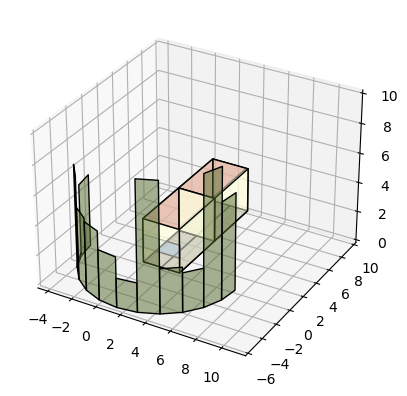

(<Figure size 640x480 with 1 Axes>, [<Axes3D: >])

In [13]:
# simulate first to see shading!
whitebox_sim.shoebox.view_model()

In [8]:
for out in whitebox_sim.schema.timeseries_outputs:
    print(out.var_name if out.key_name is None else out.key_name)

Zone Ideal Loads Zone Total Heating Energy
Zone Ideal Loads Zone Total Cooling Energy
Lights Total Heating Energy
Zone Windows Total Transmitted Solar Radiation Energy
Cooling:DistrictCooling
Heating:DistrictHeating
Zone Ideal Loads Supply Air Total Heating Energy
Zone Ideal Loads Supply Air Total Cooling Energy
Zone Ideal Loads Outdoor Air Total Heating Energy
Zone Ideal Loads Outdoor Air Total Cooling Energy


In [9]:
res_monthly


IndexGroup,Facility:DistrictHeating:Heating,Facility:DistrictCooling:Cooling
KeyValue,,
Name,Heating:DistrictHeating,Cooling:DistrictCooling
2018-01-01,6.542484e+08,1.451549e+08
2018-02-01,4.330184e+08,2.206827e+08
2018-03-01,3.687470e+08,1.884335e+08
2018-04-01,2.108675e+08,2.689301e+08
2018-05-01,6.791479e+07,3.075255e+08
2018-06-01,1.203078e+07,5.591559e+08
2018-07-01,3.150412e+04,9.877798e+08
2018-08-01,0.000000e+00,9.795303e+08


In [18]:
res_hourly.head()

IndexGroup                                                    System  \
KeyValue                 BLOCK PERIM STOREY 0 IDEAL LOADS AIR SYSTEM   
Name                Zone Ideal Loads Supply Air Total Heating Energy   
2018-01-01 00:00:00                                         0.000000   
2018-01-01 01:00:00                                    129595.998602   
2018-01-01 02:00:00                                    378041.246208   
2018-01-01 03:00:00                                    619311.680120   
2018-01-01 04:00:00                                    744061.943396   

IndexGroup                                                            \
KeyValue                                                               
Name                Zone Ideal Loads Supply Air Total Cooling Energy   
2018-01-01 00:00:00                                              0.0   
2018-01-01 01:00:00                                              0.0   
2018-01-01 02:00:00                                              0.0   
2018-01-01 03:00:00                                              0.0   
2018-01-01 04:00:00                                              0.0   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Heating Energy   
2018-01-01 00:00:00                                   0.000000   
2018-01-01 01:00:00                              129595.998602   
2018-01-01 02:00:00                              378041.246208   
2018-01-01 03:00:00                              619311.680120   
2018-01-01 04:00:00                              744061.943396   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Cooling Energy   
2018-01-01 00:00:00                               0.000000e+00   
2018-01-01 01:00:00                               1.940847e-09   
2018-01-01 02:00:00                               6.266987e-09   
2018-01-01 03:00:00                               1.880096e-08   
2018-01-01 04:00:00                               2.207514e-08   

IndexGroup                                                            \
KeyValue                  BLOCK CORE STOREY 0 IDEAL LOADS AIR SYSTEM   
Name                Zone Ideal Loads Supply Air Total Heating Energy   
2018-01-01 00:00:00                                     5.743836e+05   
2018-01-01 01:00:00                                     7.379556e+05   
2018-01-01 02:00:00                                     8.710539e+05   
2018-01-01 03:00:00                                     1.028869e+06   
2018-01-01 04:00:00                                     1.076233e+06   

IndexGroup                                                            \
KeyValue                                                               
Name                Zone Ideal Loads Supply Air Total Cooling Energy   
2018-01-01 00:00:00                                              0.0   
2018-01-01 01:00:00                                              0.0   
2018-01-01 02:00:00                                              0.0   
2018-01-01 03:00:00                                              0.0   
2018-01-01 04:00:00                                              0.0   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Heating Energy   
2018-01-01 00:00:00                               5.743836e+05   
2018-01-01 01:00:00                               7.379556e+05   
2018-01-01 02:00:00                               8.710539e+05   
2018-01-01 03:00:00                               1.028869e+06   
2018-01-01 04:00:00                               1.076233e+06   

IndexGroup                                                      
KeyValue                                

In [20]:
res_monthly.sum()


IndexGroup                        KeyValue  Name                   
Facility:DistrictHeating:Heating            Heating:DistrictHeating    2.366676e+09
Facility:DistrictCooling:Cooling            Cooling:DistrictCooling    6.560333e+09
dtype: float64

In [29]:
res_hourly.sum()

IndexGroup  KeyValue                                     Name                                            
System      BLOCK PERIM STOREY 0 IDEAL LOADS AIR SYSTEM  Zone Ideal Loads Supply Air Total Heating Energy    8.779674e+08
                                                         Zone Ideal Loads Supply Air Total Cooling Energy    5.268667e+09
                                                         Zone Ideal Loads Zone Total Heating Energy          8.779720e+08
                                                         Zone Ideal Loads Zone Total Cooling Energy          5.268671e+09
            BLOCK CORE STOREY 0 IDEAL LOADS AIR SYSTEM   Zone Ideal Loads Supply Air Total Heating Energy    1.488709e+09
                                                         Zone Ideal Loads Supply Air Total Cooling Energy    1.291667e+09
                                                         Zone Ideal Loads Zone Total Heating Energy          1.488710e+09
                                        